<a href="https://colab.research.google.com/github/VIVEK-JADHAV/TweetSentimentExtraction/blob/master/CaseStudy2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#Creating a folder to store train and test data
import os
os.mkdir('/content/data')
%cd /content/data/
!pwd

/content/data
/content/data


In [8]:
!kaggle competitions download -c tweet-sentiment-extraction

  0% 0.00/41.4k [00:00<?, ?B/s]
100% 41.4k/41.4k [00:00<00:00, 18.9MB/s]
  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 66.5MB/s]
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 97.1MB/s]


In [9]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


## EDA  


### Check for null values

In [10]:
#Loading the train dataset

train=pd.read_csv('/content/data/train.csv')
print('Shape of the train data is ',train.shape)
train.head()

Shape of the train data is  (27481, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


* Train dataset has 27481 datapoints and 4 features.

In [11]:
#Loading the test dataset

test=pd.read_csv('/content/data/test.csv')
print('Shape of the test data is ',test.shape)
test.head()

Shape of the test data is  (3534, 3)


,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


* Test dataset has 3534 datapoints and 3 features.

In [12]:
#Information regarding train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


* text and selected_text columns have one null value and hence, dropping that data point.

In [13]:
#Dropping the row with null value
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [14]:
#Information regarding test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


* Test dataset has no rows with null values.

### Analysing sentiment feature

In [ ]:
#Number of tweets for each category of sentiment
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

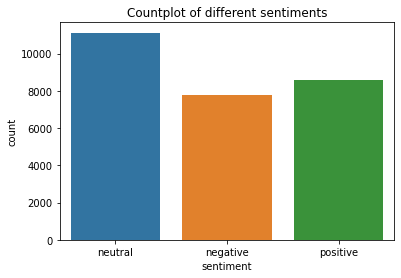

In [ ]:
ax=sns.countplot(x=train['sentiment'])
ax.set_title('Countplot of different sentiments')
plt.show()

* There are three categories of sentiment: neutral,positive,negative with neutral being largest in number.
* Positive and negative sentiment are also large in number, hence, the sentiment feature is not imbalanced with one feature.

### Generating Metafeatures for analysing text and selected_text features.

In [15]:
#Creating metafeatures like word length of text,word length of selected_text and their difference

train['word_length_text']=train['text'].apply(lambda x: len(x.split()))
train['word_length_selected_text']=train['selected_text'].apply(lambda x: len(x.split()))
train['diff_word_length']=train['word_length_text']-train['word_length_selected_text']

train.head()

,textID,text,selected_text,sentiment,word_length_text,word_length_selected_text,diff_word_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11


In [16]:
# Finding jaccard score between text and selected_text

def jaccard(row):
  '''Returns jaccard score between str1 and str2 '''
  a = set(row['text'].lower().split()) 
  b = set(row['selected_text'].lower().split())
  c = a.intersection(b)
  return float(len(c)) / (len(a) + len(b) - len(c))

train['jaccard']=train.apply(jaccard,axis=1)
train.head()

,textID,text,selected_text,sentiment,word_length_text,word_length_selected_text,diff_word_length,jaccard
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,2,8,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,5,2,3,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,3,2,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,3,11,0.214286


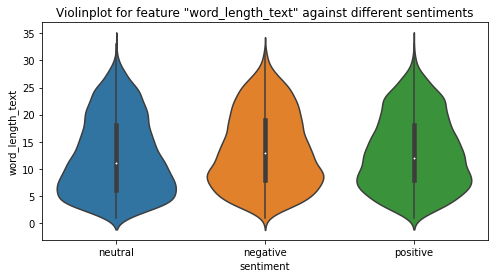

In [ ]:
#Analysing the feature word_length_text

fig,ax=plt.subplots(figsize=(8,4))
sns.violinplot(x=train['sentiment'],y=train['word_length_text'],ax=ax)
ax.set_title('Violinplot for feature "word_length_text" against different sentiments')

plt.show()

* The distribution of word_length_text among different sentiments is similar with little difference.
* There seems to be high number of tweets with length between 5 to 7 irrespective of sentiment.

In [ ]:
pos=train['word_length_text'][train['sentiment']=='positive'].value_counts()
print('The top 5 most occuring values for word_length_text with postive sentiment')
print(pos[0:5])

print('************************************************************************************')

neg=train['word_length_text'][train['sentiment']=='negative'].value_counts()
print('The top 5 most occuring values for word_length_text with negative sentiment')
print(neg[0:5])

print('************************************************************************************')
neu=train['word_length_text'][train['sentiment']=='neutral'].value_counts()
print('The top 5 most occuring values for word_length_text with neutral sentiment')
print(neu[0:5])

The top 5 most occuring values for word_length_text with postive sentiment
7     492
9     487
8     475
6     451
12    429
Name: word_length_text, dtype: int64
************************************************************************************
The top 5 most occuring values for word_length_text with negative sentiment
9     455
8     449
10    429
7     416
6     394
Name: word_length_text, dtype: int64
************************************************************************************
The top 5 most occuring values for word_length_text with neutral sentiment
7    657
6    641
4    638
5    630
8    612
Name: word_length_text, dtype: int64


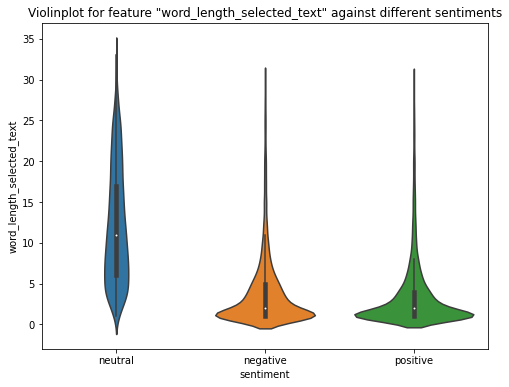

In [ ]:
#Analysing the feature word_length_selected_text

fig,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x=train['sentiment'],y=train['word_length_selected_text'],ax=ax)
ax.set_title('Violinplot for feature "word_length_selected_text" against different sentiments')

plt.show()

* The neutral tweets set to have higher word length for selected_text compared to postive and negative tweets.
* Moreover, neutral tweets have similar percentile ranges for word_length_selected_text and word_length_text.
* Postive and negative tweets have lower word length for selected text feature with a peak around 1 to 3.

In [ ]:
pos=train['word_length_selected_text'][train['sentiment']=='positive'].value_counts()
print('The top 5 most occuring values for word_length_selected_text with postive sentiment')
print(pos[0:5])

print('************************************************************************************')

neg=train['word_length_selected_text'][train['sentiment']=='negative'].value_counts()
print('The top 5 most occuring values for word_length_selected_text with negative sentiment')
print(neg[0:5])

print('************************************************************************************')
neu=train['word_length_selected_text'][train['sentiment']=='neutral'].value_counts()
print('The top 5 most occuring values for word_length_selected_text with neutral sentiment')
print(neu[0:5])


The top 5 most occuring values for word_length_selected_text with postive sentiment
1    3716
2    1342
3     873
4     691
5     435
Name: word_length_selected_text, dtype: int64
************************************************************************************
The top 5 most occuring values for word_length_selected_text with negative sentiment
1    3000
2    1054
3     842
4     668
5     544
Name: word_length_selected_text, dtype: int64
************************************************************************************
The top 5 most occuring values for word_length_selected_text with neutral sentiment
6    662
7    658
4    655
5    645
8    633
Name: word_length_selected_text, dtype: int64


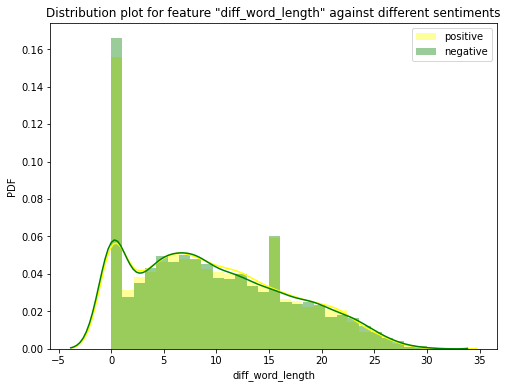

In [ ]:
#Analysing feature diff_word_length for positive and negative sentiment
fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(train['diff_word_length'][train['sentiment']=='positive'],ax=ax,color='yellow',label='positive')
sns.distplot(train['diff_word_length'][train['sentiment']=='negative'],ax=ax,color='green',label='negative')

ax.set_title('Distribution plot for feature "diff_word_length" against different sentiments')
ax.set_ylabel('PDF')
ax.legend()

plt.show()

* The difference in word length for postive and negative tweets have similar distribution with a peak near 0

In [ ]:
pos=train['diff_word_length'][train['sentiment']=='positive'].value_counts()
print('The top 5 most occuring values for diff_word_length with postive sentiment')
print(pos[0:5])

percent_pos_zero=pos.loc[0]*100/pos.sum()
print('The percent of positive tweets with zero difference in word length is ',percent_pos_zero)
print('************************************************************************************')

neg=train['diff_word_length'][train['sentiment']=='negative'].value_counts()
print('The top 5 most occuring values for diff_word_length with negative sentiment')
print(neg[0:5])

percent_neg_zero=neg.loc[0]*100/neg.sum()
print('The percent of negative tweets with zero difference in word length is ',percent_neg_zero)

The top 5 most occuring values for diff_word_length with postive sentiment
0    1171
6     465
7     441
8     433
5     423
Name: diff_word_length, dtype: int64
The percent of positive tweets with zero difference in word length is  13.644838033092519
************************************************************************************
The top 5 most occuring values for diff_word_length with negative sentiment
0    1190
7     417
5     415
8     401
6     386
Name: diff_word_length, dtype: int64
The percent of negative tweets with zero difference in word length is  15.293664053463566


* For positive tweets, 13.64% of tweets have same text and selected_text length and for negative tweets, this values goes up to 15.29%

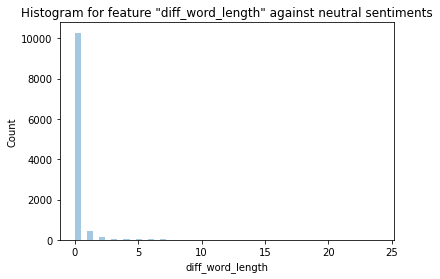

In [ ]:
#Analysing feature diff_word_length for neutral sentiment
fig,ax=plt.subplots()
sns.distplot(train['diff_word_length'][train['sentiment']=='neutral'],ax=ax,kde=False)


ax.set_title('Histogram for feature "diff_word_length" against neutral sentiments')
ax.set_ylabel('Count')

plt.show()

* Most of the tweets with neutral sentiment have difference of word length equal to zero

In [ ]:
neu=train['diff_word_length'][train['sentiment']=='neutral'].value_counts()
print('The top 5 most occuring values for diff_word_length with postive sentiment')
print(neu.iloc[0:5])

percent_neu_zero=neu.loc[0]*100/neu.sum()
print('The percent of neutral tweets with zero difference in word length is ',percent_neu_zero)

The top 5 most occuring values for diff_word_length with postive sentiment
0    10278
1      422
2      134
3       40
4       38
Name: diff_word_length, dtype: int64
The percent of neutral tweets with zero difference in word length is  92.45299991004768


* There are 92% of neutral tweets which have same text length as that of selected_text length.

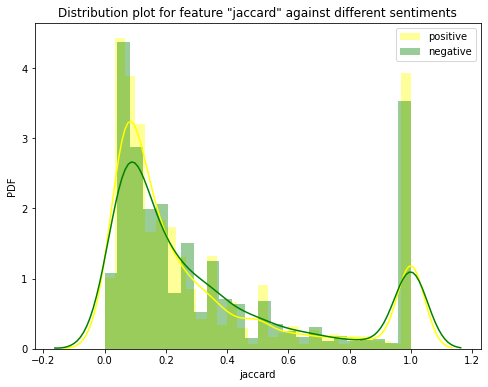

In [ ]:
#Analysing feature jaccard score

fig,ax=plt.subplots(figsize=(8,6))
sns.distplot(train['jaccard'][train['sentiment']=='positive'],ax=ax,color='yellow',label='positive')
sns.distplot(train['jaccard'][train['sentiment']=='negative'],ax=ax,color='green',label='negative')

ax.set_title('Distribution plot for feature "jaccard" against different sentiments')
ax.set_ylabel('PDF')
ax.legend()

plt.show()

* The distribution of jaccard score for positive and negative tweets are similar with peaks at 0.1 and 1.
* This tells that there are large number of positive and negative tweets with either less words in selected_text or same number of words as in main text.

In [ ]:
pos=train['jaccard'][train['sentiment']=='positive'].value_counts()
print('The top 5 most occuring values for jaccard with postive sentiment')
print(pos.iloc[0:5])

percent_pos_zero=pos.loc[1]*100/pos.sum()
print('The percent of positive tweets with jaccard score of 1 is ',percent_pos_zero)
print('************************************************************************************')

neg=train['jaccard'][train['sentiment']=='negative'].value_counts()
print('The top 5 most occuring values for jaccard with negative sentiment')
print(neg.iloc[0:5])

percent_neg_zero=neg.loc[1]*100/neg.sum()
print('The percent of negative tweets with jaccard score of 1 is ',percent_neg_zero)

The top 5 most occuring values for jaccard with postive sentiment
1.000000    1124
0.166667     338
0.142857     303
0.250000     301
0.200000     297
Name: jaccard, dtype: int64
The percent of positive tweets with jaccard score of 1 is  13.097180144488464
************************************************************************************
The top 5 most occuring values for jaccard with negative sentiment
1.000000    1143
0.333333     299
0.000000     276
0.200000     270
0.250000     258
Name: jaccard, dtype: int64
The percent of negative tweets with jaccard score of 1 is  14.689628582444415


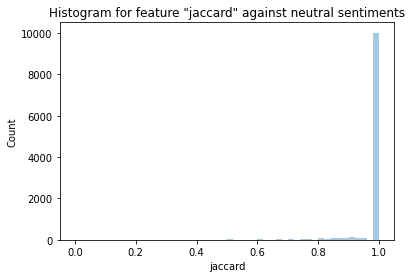

In [17]:
#Analysing feature jaccard score for neutral sentiment
fig,ax=plt.subplots()
sns.distplot(train['jaccard'][train['sentiment']=='neutral'],ax=ax,kde=False)


ax.set_title('Histogram for feature "jaccard" against neutral sentiments')
ax.set_ylabel('Count')

plt.show()

In [ ]:
neu=train['jaccard'][train['sentiment']=='neutral'].value_counts()
print('The top 5 most occuring values for jaccard score with neutral sentiment')
print(neu.iloc[0:5])

percent_neu_zero=neu.loc[1]*100/neu.sum()
print('The percent of neutral tweets with jaccard score of 1 is ',percent_neu_zero)

The top 5 most occuring values for jaccard score with neutral sentiment
1.000000    10012
0.857143       52
0.750000       50
0.875000       49
0.800000       48
Name: jaccard, dtype: int64
The percent of neutral tweets with jaccard score of 1 is  90.06026805792929


* 90% of the neutral tweets have a jaccard score of 1

### Analysising frequent words in selected_text for each sentiment

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def frequent_words(data):
  '''Takes a selected_text of particular sentiment and retuns most occuring words '''

  #Using CountVectorizer, finding all the unique words and convert to BOW vectors
  vectorizer = CountVectorizer()
  df= vectorizer.fit_transform(data).todense()

  #A dataframe with words as column names and each row represents BOW vector
  sentiment_df=pd.DataFrame(df,columns=vectorizer.get_feature_names())

  #Summing each column gives number of occurance of each word
  sentiment_words=sentiment_df.sum(axis=0).sort_values(ascending=False)
  return sentiment_words
  

In [ ]:
#Filtering the positive tweets
positive_tweets=train['selected_text'][train['sentiment']=='positive']

#Getting frequent words for positive sentiment
positive_words=frequent_words(positive_tweets)
print('The top 10 most occuring words in postive tweets are')
print(positive_words[0:10])

The top 10 most occuring words in postive tweets are
good      830
happy     733
you       709
love      700
to        608
the       573
day       469
thanks    444
it        443
great     364
dtype: int64


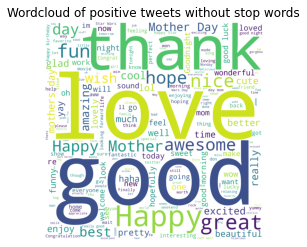

In [ ]:
#Wordcloud of positive tweets without stop words

stopwords=set(STOPWORDS)
positive_text=" ".join(list(positive_tweets.values))

wordcloudPositive = WordCloud(width = 1500, height = 1500, 
                background_color ='white',
                stopwords=stopwords,                
                min_font_size = 10).generate(positive_text)
plt.axis("off")
plt.title('Wordcloud of positive tweets without stop words')
plt.imshow(wordcloudPositive)
plt.show()

In [ ]:
#Filtering the negative tweets
negative_tweets=train['selected_text'][train['sentiment']=='negative']

#Getting frequent words for positive sentiment
negative_words=frequent_words(negative_tweets)
print('The top 10 most occuring words in negative tweets are')
print(negative_words[0:10])

The top 10 most occuring words in negative tweets are
to      595
the     547
my      528
it      433
not     408
is      374
so      363
miss    359
sad     344
me      320
dtype: int64


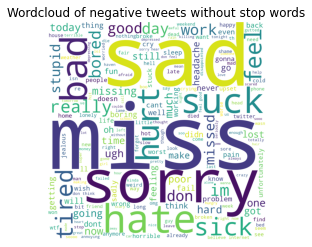

In [ ]:
#Wordcloud of negative tweets without stop words
negative_text=" ".join(list(negative_tweets.values))

wordcloudNegative = WordCloud(width = 1500, height = 1500, 
                background_color ='white',
                stopwords=stopwords,                
                min_font_size = 10).generate(negative_text)
plt.axis("off")
plt.title('Wordcloud of negative tweets without stop words')
plt.imshow(wordcloudNegative)
plt.show()

In [ ]:
#Filtering the neutral tweets
neutral_tweets=train['selected_text'][train['sentiment']=='neutral']

#Getting frequent words for positive sentiment
neutral_words=frequent_words(neutral_tweets)
print('The top 10 most occuring words in neutral tweets are')
print(neutral_words[0:10])

The top 10 most occuring words in neutral tweets are
to     4108
the    3491
it     1986
my     1985
you    1924
and    1837
in     1583
is     1484
for    1411
on     1268
dtype: int64


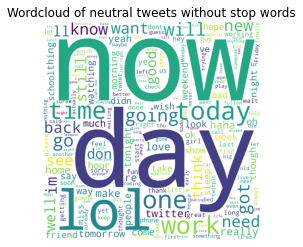

In [ ]:
#Wordcloud of neutral tweets without stop words
neutral_text=" ".join(list(neutral_tweets.values))

wordcloudNeutral = WordCloud(width = 1500, height = 1500, 
                background_color ='white',
                stopwords=stopwords,                
                min_font_size = 10).generate(neutral_text)
plt.axis("off")
plt.title('Wordcloud of neutral tweets without stop words')
plt.imshow(wordcloudNeutral)
plt.show()

### SUMMARY

* Train data had one null value which was dropped
* Neutral sentiment has the largest number of tweets.
* There are large number of tweets with word length 5 to 7 irrespective of sentiment value.
* Neutral sentiment has higher number of words in the selected_text compared to postive and negative sentiment.
Infact, 92% of neutral tweets have equal word length with selected_text and high Jaccard score of 1.
Thus, neutral tweets can be returned as it is as the selected_text
* Postive and negative sentiment have similar distribution for difference in word length and jaccard score.